In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
#import bagpipes as pipes
from astropy.table import Table
from astropy import units as u
from scipy.stats import norm
from astropy.stats import sigma_clipped_stats
import matplotlib.ticker as ticker

In [2]:
from matplotlib import rc                # Establece parámetros iniciales al grupo
rc('text', usetex=False)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # Controla tamaño de texto por defecto
plt.rc('axes', titlesize=BIGGER_SIZE)    # Tamaño de las fuentes de los títulos 
plt.rc('axes', labelsize=MEDIUM_SIZE)    # Tamaño de las fuentes de los ejes x e y
plt.rc('xtick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # Tamaño de las leyendas
plt.rc('figure', titlesize=BIGGER_SIZE)  # Tamaño de la fuente del título de la figura

# Redshift with NED

In [3]:
table = Table.read('crossmatch')
table

<Table length=47>
NUMBER  FLUX_ISO FLUXERR_ISO ... Associations      Separation     
                             ...                     arcsec       
int32   float32    float32   ...    int16           float64       
------ --------- ----------- ... ------------ --------------------
 22665 41854.723  10.7883005 ...            0   0.3771670112379454
 52847 35164.773   12.735505 ...            0    0.672245776528174
 72934  9284.905   6.5459003 ...            0  0.14216549680164736
 94396 44790.613   13.369453 ...            0  0.17060734468443411
 98767 20175.846    7.470551 ...            0  0.23499055227467586
155064 19177.047    9.093101 ...            0   0.1900316920510955
201829  40879.64   19.937101 ...            0  0.37791048567050917
202423  35626.21   17.092657 ...            0  0.21392350713290545
203982  65488.47   13.679038 ...            0   0.5136522552437323
   ...       ...         ... ...          ...                  ...
509559 36395.734    16.90925 ...            0  0.15210326704393198
511664  81411.25   41.806435 ...            0  0.23149053071112163
515607 241772.89  109.510704 ...            0   0.1159937163828435
519452  84679.37   21.829716 ...            0   0.2580353594487739
524530  79834.35   19.905968 ...            0  0.28179536156531265
526511 31139.291   20.305288 ...            0 0.018547441055928347
527206  69215.79    28.79866 ...            0  0.12382772925007476
529890  49345.53    19.90935 ...            0    0.298216428334868
532529 24779.201    9.733167 ...            0  0.15422836152694167
544202 38356.617   18.406593 ...            0  0.13759059877324176

In [4]:
dat = Table.read('pipes/cats/cross1_cat.fits')
dat

<Table length=19>
 #ID      burst:age_16    ...     log_evidence      log_evidence_err 
bytes2      float64       ...       float64             float64      
------ ------------------ ... ------------------- -------------------
     1  9.237382735627351 ...  -8493.994546680118  0.2531991422524056
     2  1.851651968045236 ... -35048.021732376095 0.29775981190400985
     3  9.192250971217694 ...   -77431.1599686389 0.25801296433483495
     4 11.642418253140043 ...  -5259.483951857547  0.2817746665521943
     5 11.242573405926425 ... -18674.604105345632  0.2772302571766391
     6 11.410042246327231 ... -3186.6941323336564 0.27062346216477784
     7  11.33287431036909 ...  -6613.929498606073  0.2820720309665141
     8 11.620578530449631 ...  -4889.867548883462  0.2697686659651601
     9 3.2393901968061223 ... -3387.8401790855232  0.2993809534106873
    10  11.50185912334424 ... -1550.6547439601259 0.26765915368050847
    11 2.6769228641158036 ...  -2567.648853060321   0.304978286901562
    12  11.31845885696812 ...  -20710.79557541471  0.2798976817759602
    13  9.868429880196445 ... -11733.332724705597 0.28942980947847036
    14  9.313530642739263 ... -25598.804285901264  0.2605667587887904
    15 11.334174213218533 ...  -5547.856506405786 0.26950387379975216
    16  5.837953971483587 ... -1961.8032718915792 0.24604219741600916
    17  9.149272636965858 ...  -95270.45589698838 0.28378771341701114
    18 11.337146851043244 ...  -3165.048861259066 0.26967066771650566
    19 11.285735092806075 ... -26012.168096541456  0.2852461624802036

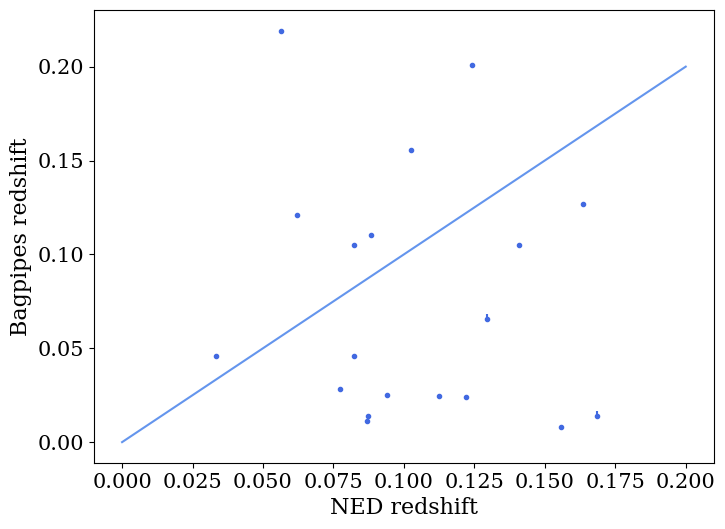

In [5]:

fig,ax=plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)
x = np.linspace(0,0.2,1000)
errx, erry = dat['redshift_50']-dat['redshift_16'], dat['redshift_84']-dat['redshift_50']
ax.errorbar(table['Redshift'][:19], dat['redshift_50'],yerr=(errx,erry), fmt='.', c ='royalblue')
ax.set_xlabel('NED redshift', size = 16)
ax.set_ylabel(r'Bagpipes redshift', size = 16)
ax.plot(x,x, color = 'cornflowerblue')
plt.show()

# Photometry test

In [6]:
#df = pd.read_csv('crossmatch_fluxes.csv', sep=",")
#df

df = Table.read('crossmatch_mag.fits') # el error es 1 arcsec
df

<Table length=33271>
NUMBER  FLUX_ISO  FLUXERR_ISO ...    i_z       z_y         Separation    
                              ...                            arcsec      
int32   float32     float32   ...  float64   float64        float64      
------ ---------- ----------- ... --------- --------- -------------------
494629  15.076058   2.2783494 ...   0.69734 -76.33336  0.5175723820181334
494654   32.25532   3.3463802 ...  0.788145  0.479628   0.093229400248822
494791  72.858154    5.011505 ...  0.175404    0.4328 0.10531666356568543
494810  354.41595    9.409895 ...  0.356823 -0.298347 0.09528864838269195
494828  19.049873   2.7838736 ...  0.710217 -76.42566 0.10199110817707631
494840  22.156748   2.9295697 ...  0.759909  1.137934 0.08723915648473902
494848  67.524155   6.3162594 ...  0.316067    0.2325  0.4367430078647943
494914   46.10773   5.1958838 ...  0.475214 -0.231554  0.1673150884513441
494969 115.447296   6.0815096 ...   1.08976  0.323929 0.12633251356327863
   ...        ...         ... ...       ...       ...                 ...
547190  27.320303   3.4792695 ... -0.391884 -0.544191 0.03973321935435951
547191    105.326   5.5599756 ...   0.56711  0.030935   0.579298244605907
547193   69.79477   5.4631896 ...  0.251299 -0.367058  0.6307434343044003
547194   76.61827    5.690922 ...  0.169706 -0.291313  0.5410785639539639
547195  21.725508   3.2597065 ... -0.021004  0.272404 0.14180330374559108
547196   80.98588   4.9859233 ...  0.287743  0.246544 0.12643049444896276
547197  31.623873   3.8045504 ... -0.053066 -0.634348 0.10184135355514523
547198  1080.8568   10.193426 ...  0.673687  0.117493  0.5001865242972238
547199  26.699478   3.3477829 ...  0.784021  0.093962 0.22026491784695862
547200  128.76851    5.464305 ...  0.315331 -0.339188 0.24969646274200466

In [7]:
mask =  df['CLASS_STAR'] > 0 #filtramos para que solo sean estrellas

In [8]:
dfs = df[mask]
#NSF
mag_NB = dfs['MAG_AUTO']
mag_g = dfs['MAG_AUTO_g_1']
mag_r = dfs['MAG_AUTO_r_1']
mag_i = dfs['MAG_AUTO_i_1']
mag_z = dfs['MAG_AUTO_z_1']
mag_y = dfs['MAG_AUTO_y_1']

#NOAO
mag_ag = dfs['mag_auto_g_2']
mag_ar = dfs['mag_auto_r_2']
mag_ai = dfs['mag_auto_i_2']
mag_az = dfs['mag_auto_z_2']
mag_ay = dfs['mag_auto_y_2']


mag_nsf = [mag_g, mag_r, mag_i, mag_z, mag_y]
mag_noao = [mag_ag, mag_ar, mag_ai, mag_az, mag_ay]
nombres = ['g', 'r', 'i', 'z', 'y']

(10, 30)

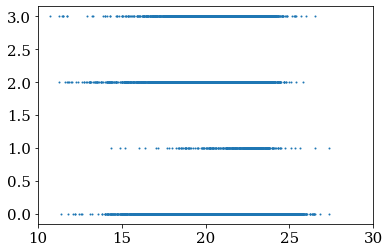

In [9]:
plt.scatter(df['MAG_AUTO_y_1'], df['FLAGS'], s =1)
#plt.hlines(0.95,0, 30)
plt.xlim(10,30)

(12, 30)

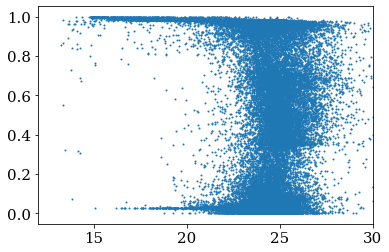

In [10]:
plt.scatter(df['MAG_AUTO_g_1'],df['CLASS_STAR'], s =1)
#plt.hlines(0.95,0, 30)
plt.xlim(12,30)

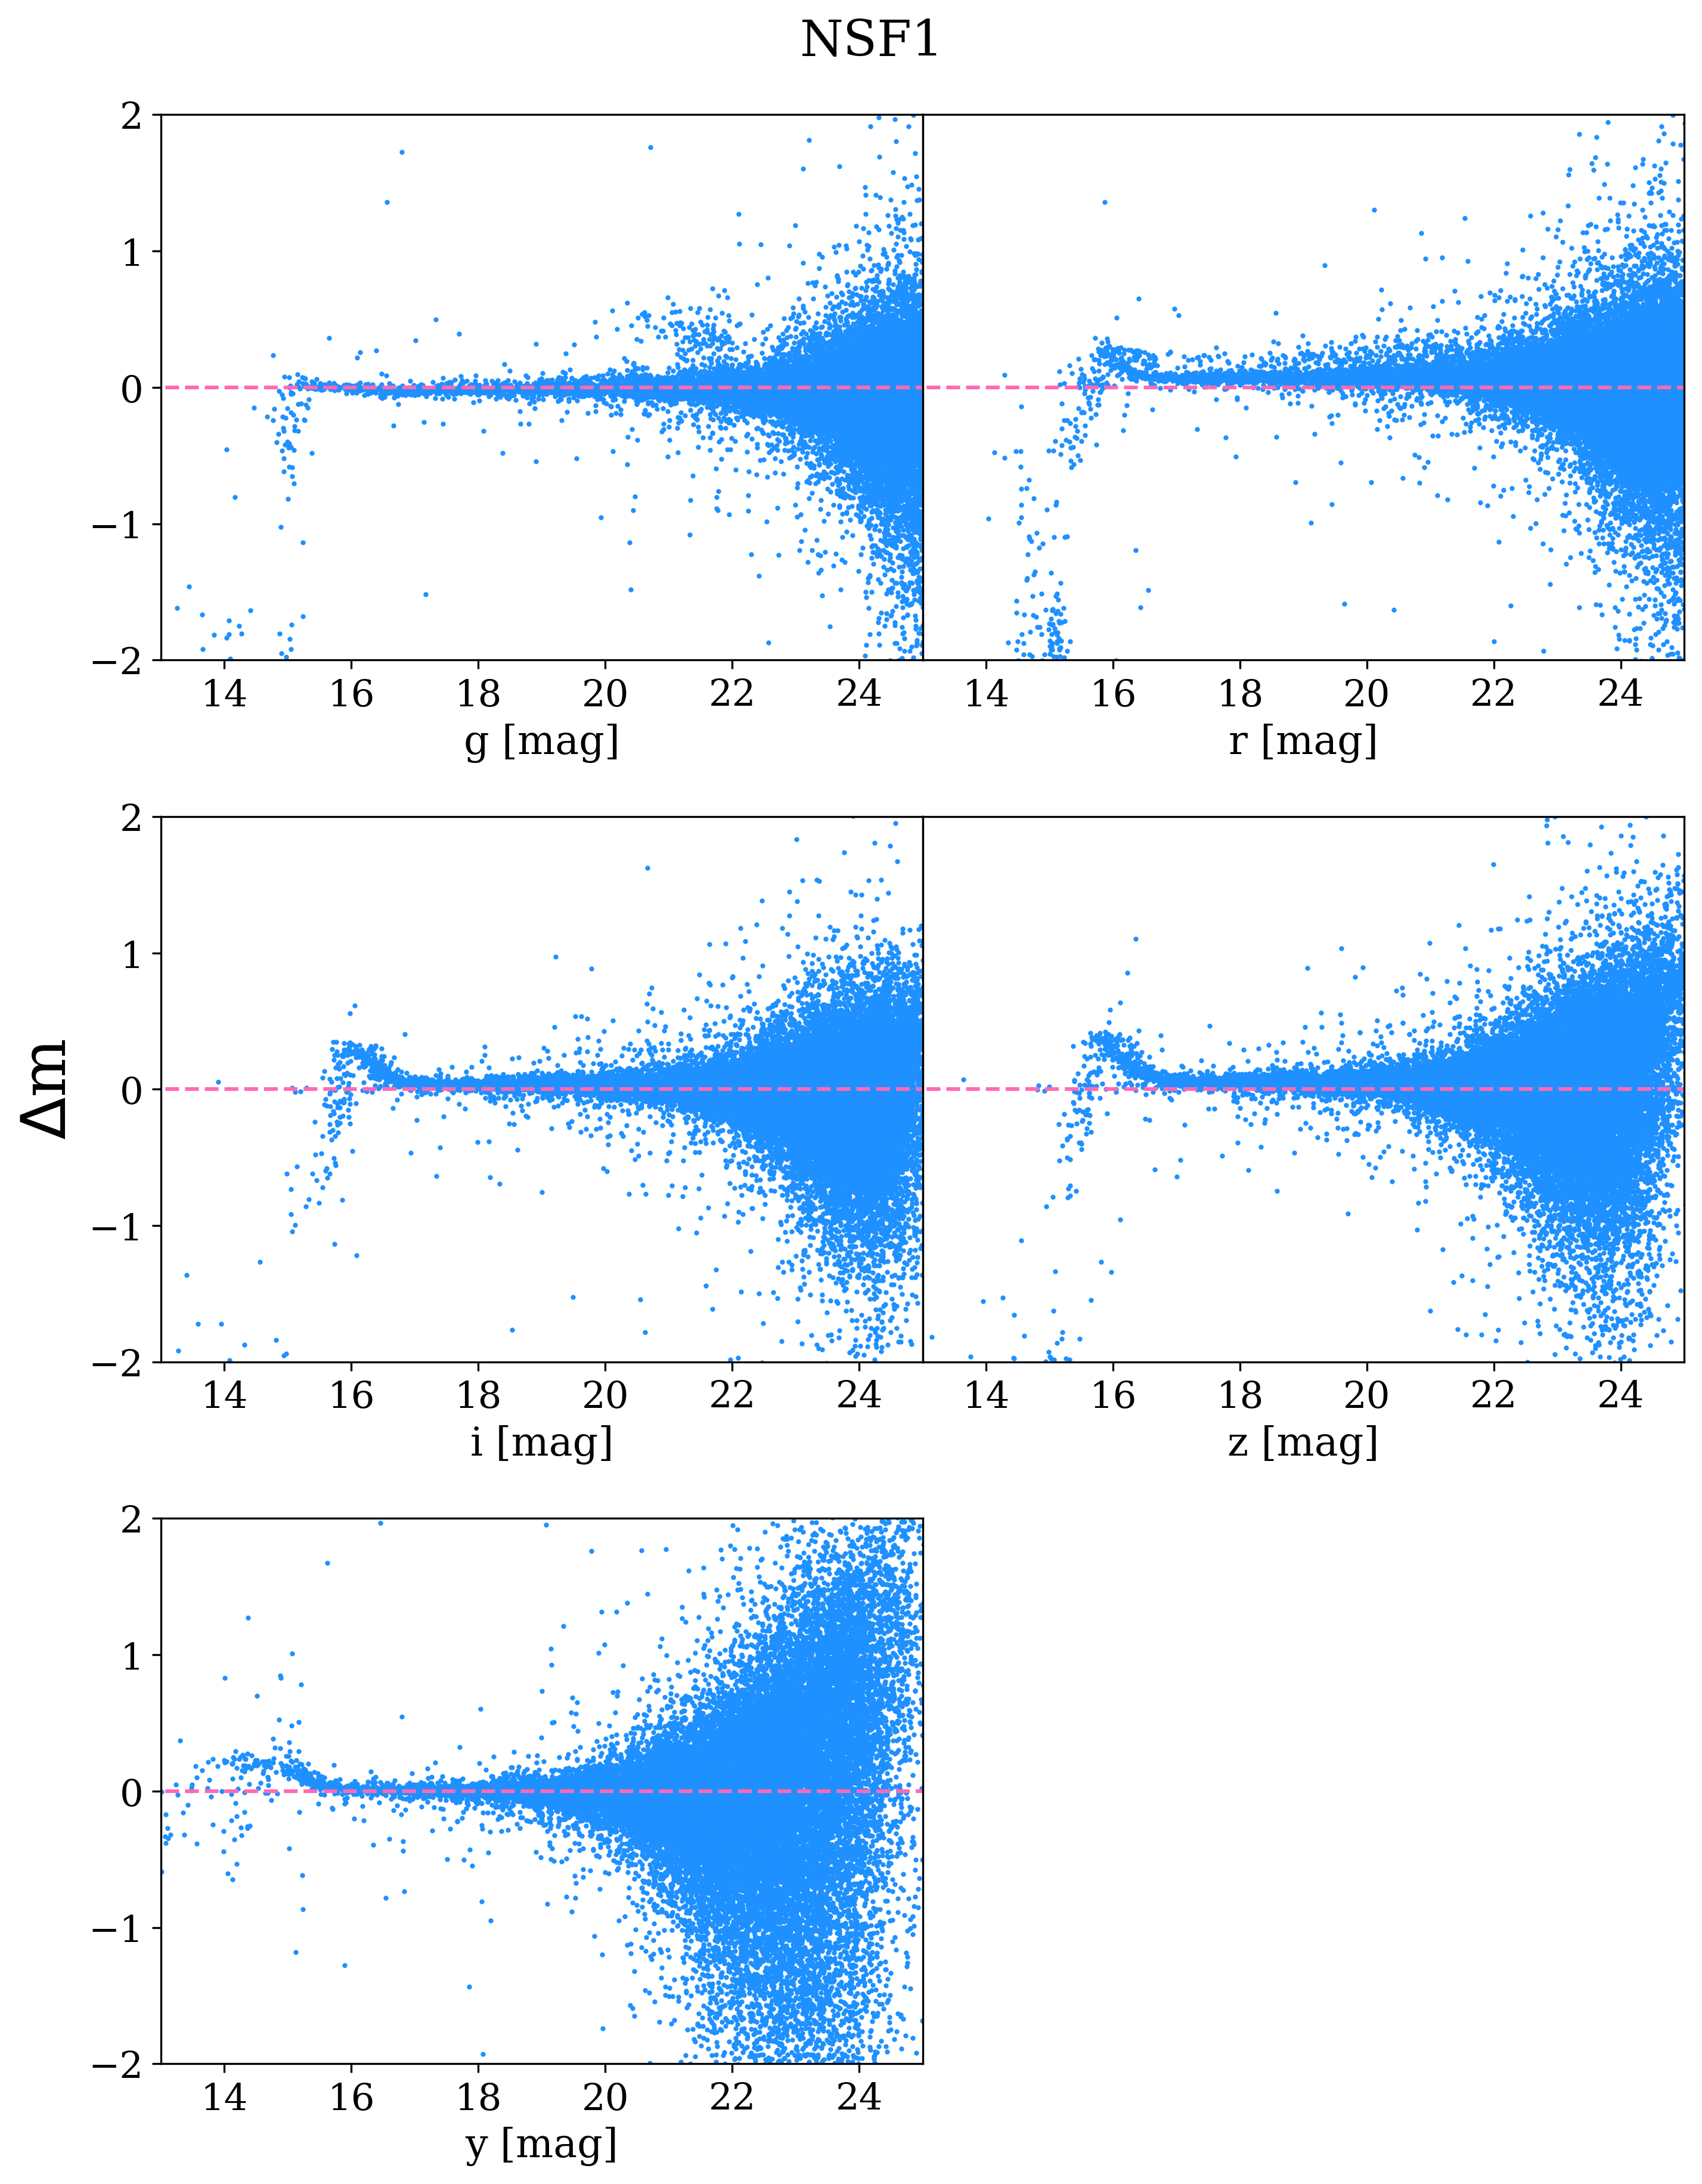

In [11]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_nsf[i]-mag_noao[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(13,25)
    ax[i//2][i-2*(i//2)].set_ylim(-2,2)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

In [12]:
%%time

sigma_c = []
color_NBz = mag_az-mag_NB


Z =[[mag,color] for mag, color in sorted(zip(mag_NB, color_NBz), key=lambda pair: pair[0])]
numb = 100
mags, colors = list(map(list, zip(*Z)))
for i, color in enumerate(colors[:-numb]):    
    sect_col = colors[i:numb+i] 
    s_c = sigma_clipped_stats(sect_col, sigma=3, cenfunc ='median')#, ‘mean’})
    sigma_c.append(s_c[2])

CPU times: user 3.66 s, sys: 18.8 ms, total: 3.67 s
Wall time: 3.67 s


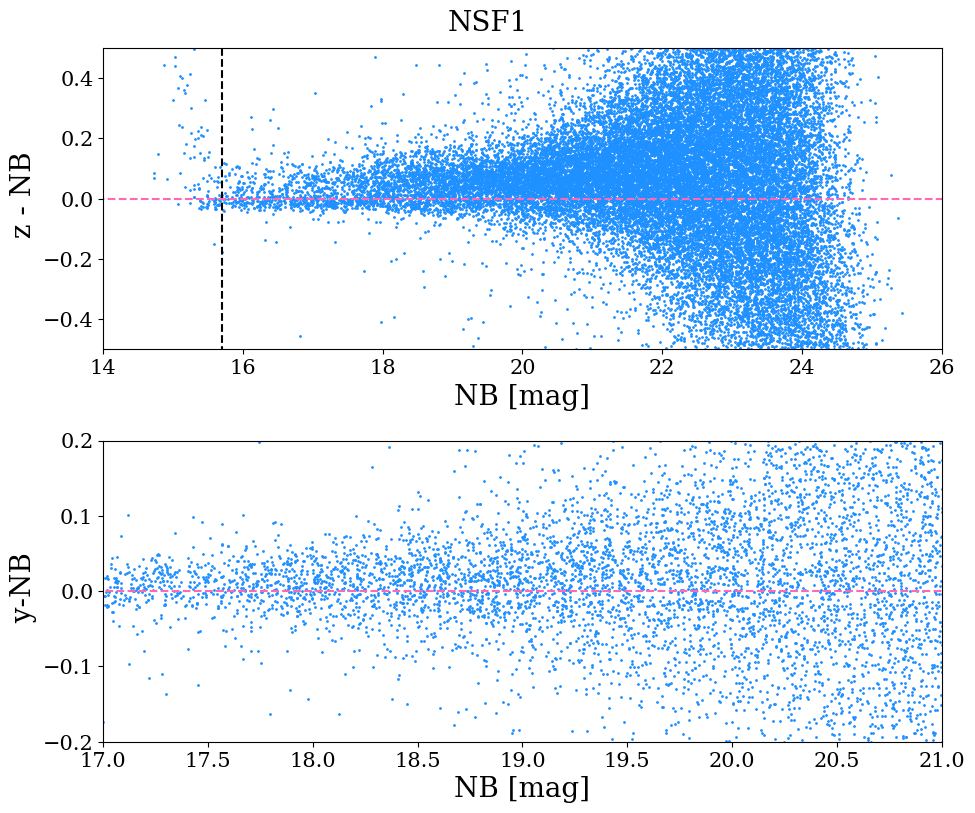

In [13]:
fig,ax=plt.subplots(ncols =1, nrows =2,figsize=(10,8), dpi=100)

#ax[0].plot(mags[:-numb], sigma_c, color = 'crimson')
ax[0].scatter(mag_NB,mag_az-mag_NB, color = 'dodgerblue', s= 1)
ax[1].scatter(mag_NB,mag_ay-mag_NB, color = 'dodgerblue', s= 1)
ax[0].vlines(15.7,-100,100, linestyles = 'dashed', color = 'k')
#ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
#ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
ax[0].set_xlabel(f'NB [mag]')
ax[1].set_xlabel(f'NB [mag]')
ax[0].set_ylabel(r' z - NB')
ax[1].set_ylabel(r' y-NB')

ax[0].set_xlim(14,26)
ax[1].set_xlim(17,21)
ax[0].set_ylim(-0.5,0.5)
ax[0].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')

ax[1].set_ylim(-0.2,0.2)
ax[1].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
ax[1].vlines(15.7,-100,100, linestyles = 'dashed', color = 'k')
    

fig.tight_layout()
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

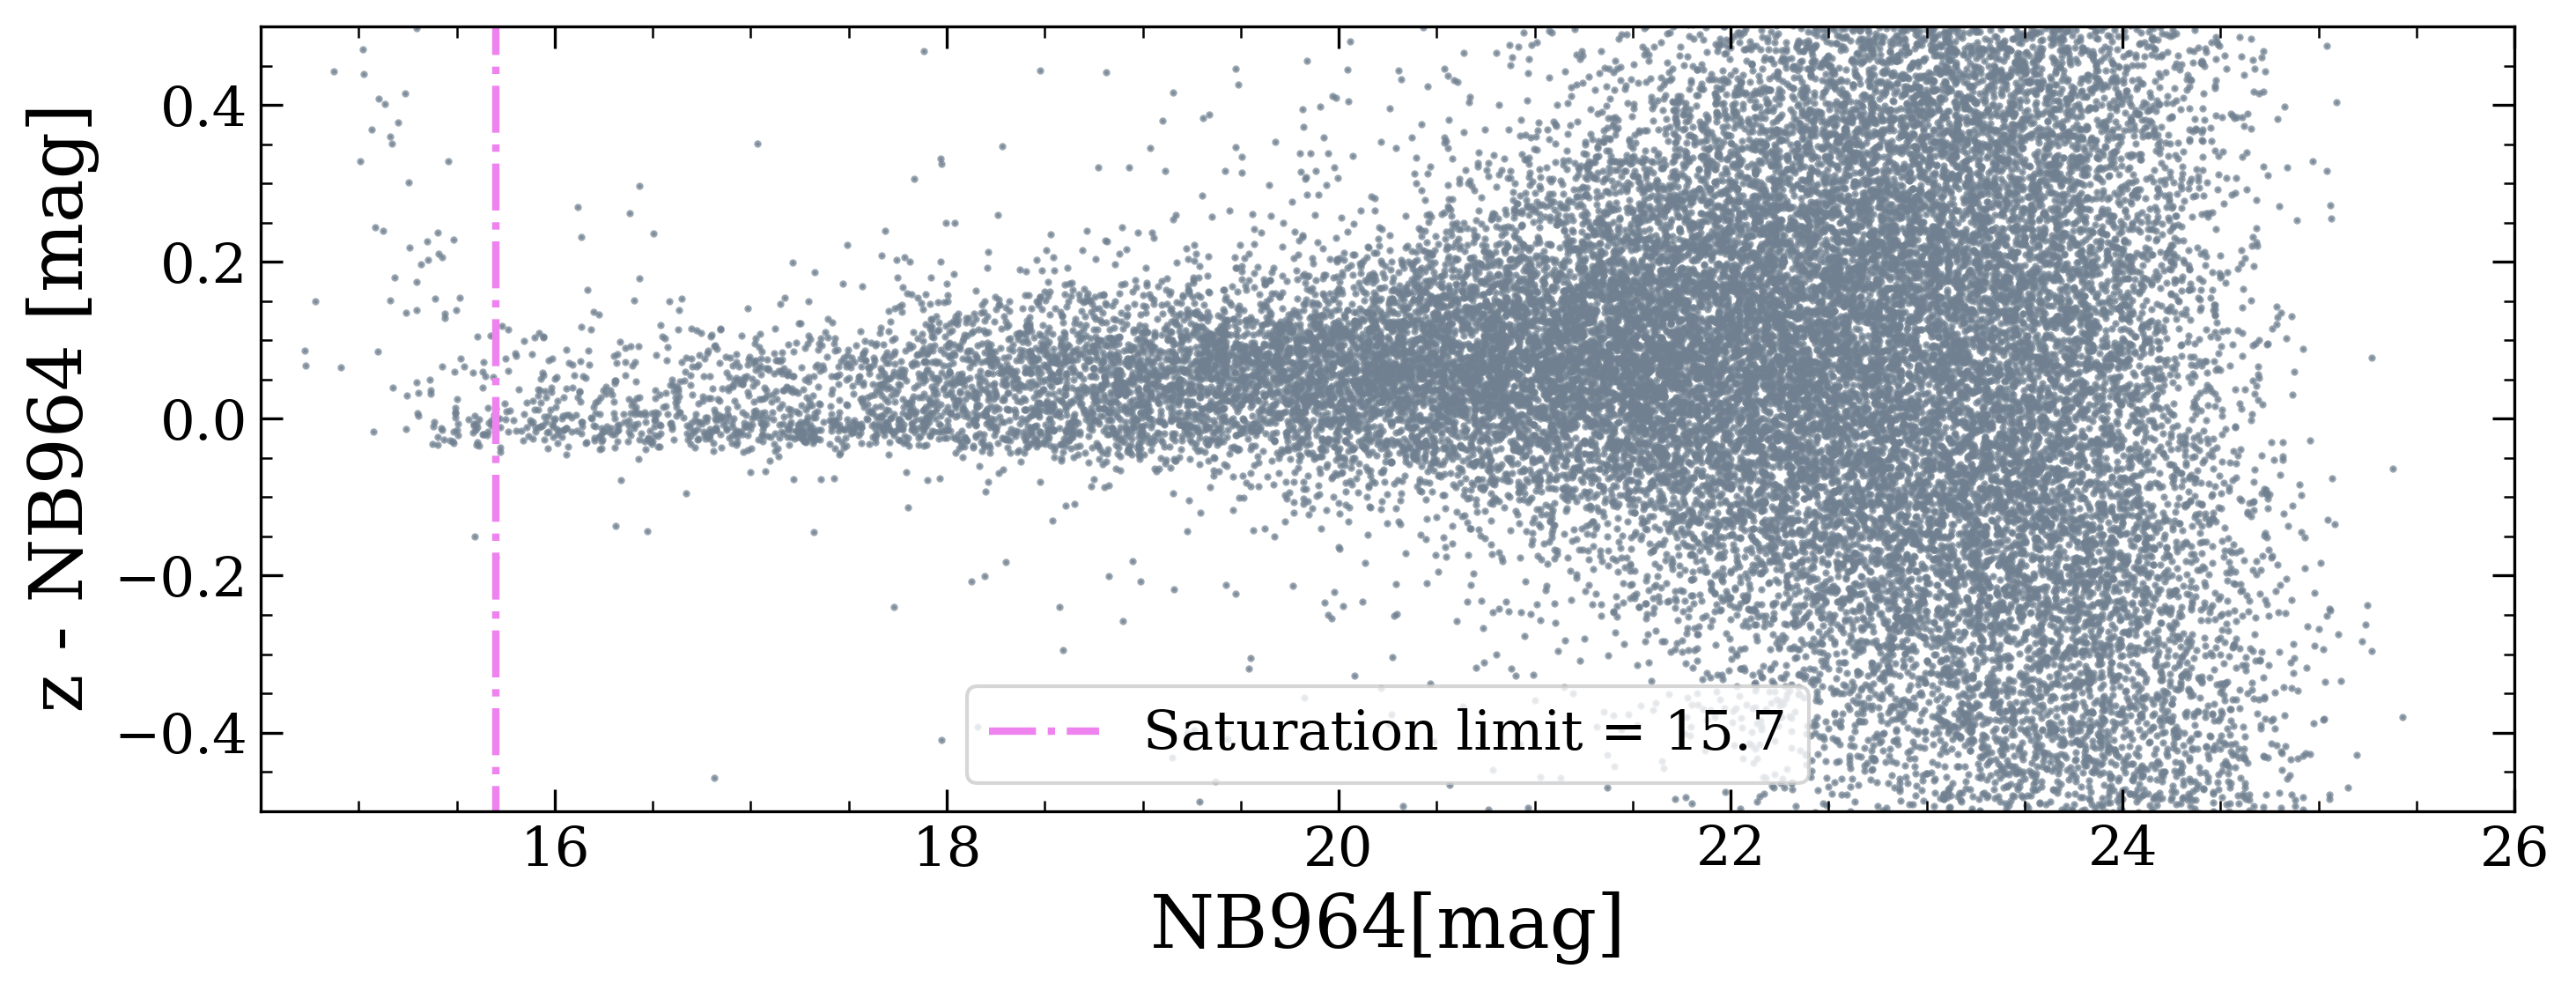

In [14]:
fig,ax=plt.subplots(ncols =1, nrows =1,figsize=(10,4), dpi=300)


ax.scatter(mag_NB,mag_az-mag_NB, color = 'slategray', s= 1, alpha = 0.7)
#ax[1].scatter(mag_NB,mag_ay-mag_NB, color = 'dodgerblue', s= 1)
ax.vlines(15.7,-100,100, linestyles = 'dashdot', color = 'violet', linewidth = 2, label = 'Saturation limit = 15.7')
#ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
#ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
ax.set_xlabel(f'NB964[mag]')
#ax[1].set_xlabel(f'NB [mag]')
ax.set_ylabel(r' z - NB964 [mag]')
#ax[1].set_ylabel(r' y-NB')

ax.set_xlim(14.5,26)
#ax[1].set_xlim(17,21)
ax.set_ylim(-0.5,0.5)
#ax.hlines(0,0,100, linestyles = 'dashed', color = 'k')

#ax[1].set_ylim(-0.2,0.2)
#ax[1].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
#ax[1].vlines(15.7,-100,100, linestyles = 'dashed', color = 'k')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))      # Ticks principales cada 1 unidades en el eje x
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))      # Ticks principales cada 1 unidades en el eje y
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax.tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax.tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)
    

fig.tight_layout()
plt.legend(loc=8, fontsize=15, markerscale=2)
#plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

## Sigma Clipping

In [15]:
keys = ['MAG_AUTO_g_1','MAG_AUTO_r_1','MAG_AUTO_i_1','MAG_AUTO_z_1','MAG_AUTO_y_1']
keys_2 = ['mag_auto_g_2','mag_auto_i_2','mag_auto_r_2','mag_auto_z_2','mag_auto_y_2']
sigmas = []

# fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):  
    mask1 = (mag >= 18) & (mag <= 20)
    n_dfs = dfs[mask1]
    #print(n_dfs[keys_2[i]].min())
    #mask2 = n_dfs[keys[i]] <= 20
    
    #new_dfs = n_dfs[mask2]
    magnsf = n_dfs[keys[i]]
    magnoao = n_dfs[keys_2[i]]
    
    #print(np.sqrt(np.var(np.array(magnsf-magnoao))))
    #print(np.std(np.array(magnsf-magnoao)))
    errors = sigma_clipped_stats(np.array(magnsf-magnoao), sigma=3, cenfunc ='median')#, ‘mean’})
    sigmas.append(errors)
    


In [16]:
sigmas

[(-0.012793971992417486, -0.013429741821287422, 0.024046912590380557),
 (0.49358177851788604, 0.4200531889648449, 0.2972879248782079),
 (-0.5603530002561533, -0.4450867166137691, 0.4293943390030164),
 (0.05600330778221975, 0.057706501464842574, 0.032634109329782945),
 (-0.007079012703605091, -0.0019109088745121738, 0.0682056982233553)]

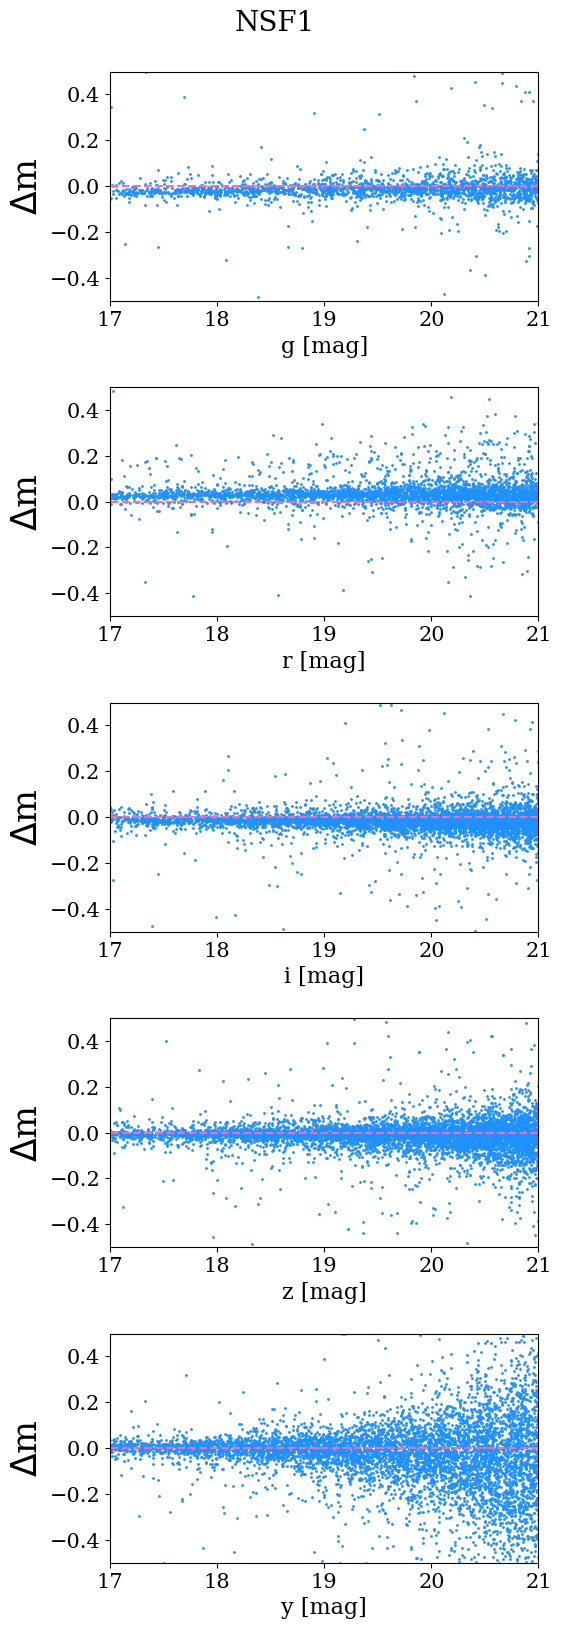

In [17]:
fig,ax=plt.subplots(ncols =1, nrows =5,figsize=(6,16),facecolor= 'w', dpi=100)


    #mask = mag < 40
ax[0].scatter(mag_nsf[0],mag_nsf[0]-sigmas[0][2]**2 -mag_noao[0], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
ax[0].set_xlabel(f'{nombres[0]} [mag]', size = 16)
ax[0].set_ylabel(r'$\Delta$m', size = 25)
ax[0].set_xlim(17,21)
ax[0].set_ylim(-0.5,0.5)
ax[0].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')

ax[1].scatter(mag_nsf[1],mag_nsf[1]-sigmas[1][2]**2/2 -mag_noao[1], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
ax[1].set_xlabel(f'{nombres[1]} [mag]', size = 16)
ax[1].set_ylabel(r'$\Delta$m', size = 25)
ax[1].set_xlim(17,21)
ax[1].set_ylim(-0.5,0.5)
ax[1].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')


ax[2].scatter(mag_nsf[2],mag_nsf[2]-sigmas[2][2]**2/4 -mag_noao[2], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
ax[2].set_xlabel(f'{nombres[2]} [mag]', size = 16)
ax[2].set_ylabel(r'$\Delta$m', size = 25)
ax[2].set_xlim(17,21)
ax[2].set_ylim(-0.5,0.5)
ax[2].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')

ax[3].scatter(mag_nsf[3],mag_nsf[3]-sigmas[3][2]*2 -mag_noao[3], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
ax[3].set_xlabel(f'{nombres[3]} [mag]', size = 16)
ax[3].set_ylabel(r'$\Delta$m', size = 25)
ax[3].set_xlim(17,21)
ax[3].set_ylim(-0.5,0.5)
ax[3].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')

ax[4].scatter(mag_nsf[4],mag_nsf[4]-sigmas[4][2]**2 -mag_noao[4], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
ax[4].set_xlabel(f'{nombres[4]} [mag]', size = 16)
ax[4].set_ylabel(r'$\Delta$m', size = 25)
ax[4].set_xlim(17,21)
ax[4].set_ylim(-0.5,0.5)
ax[4].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

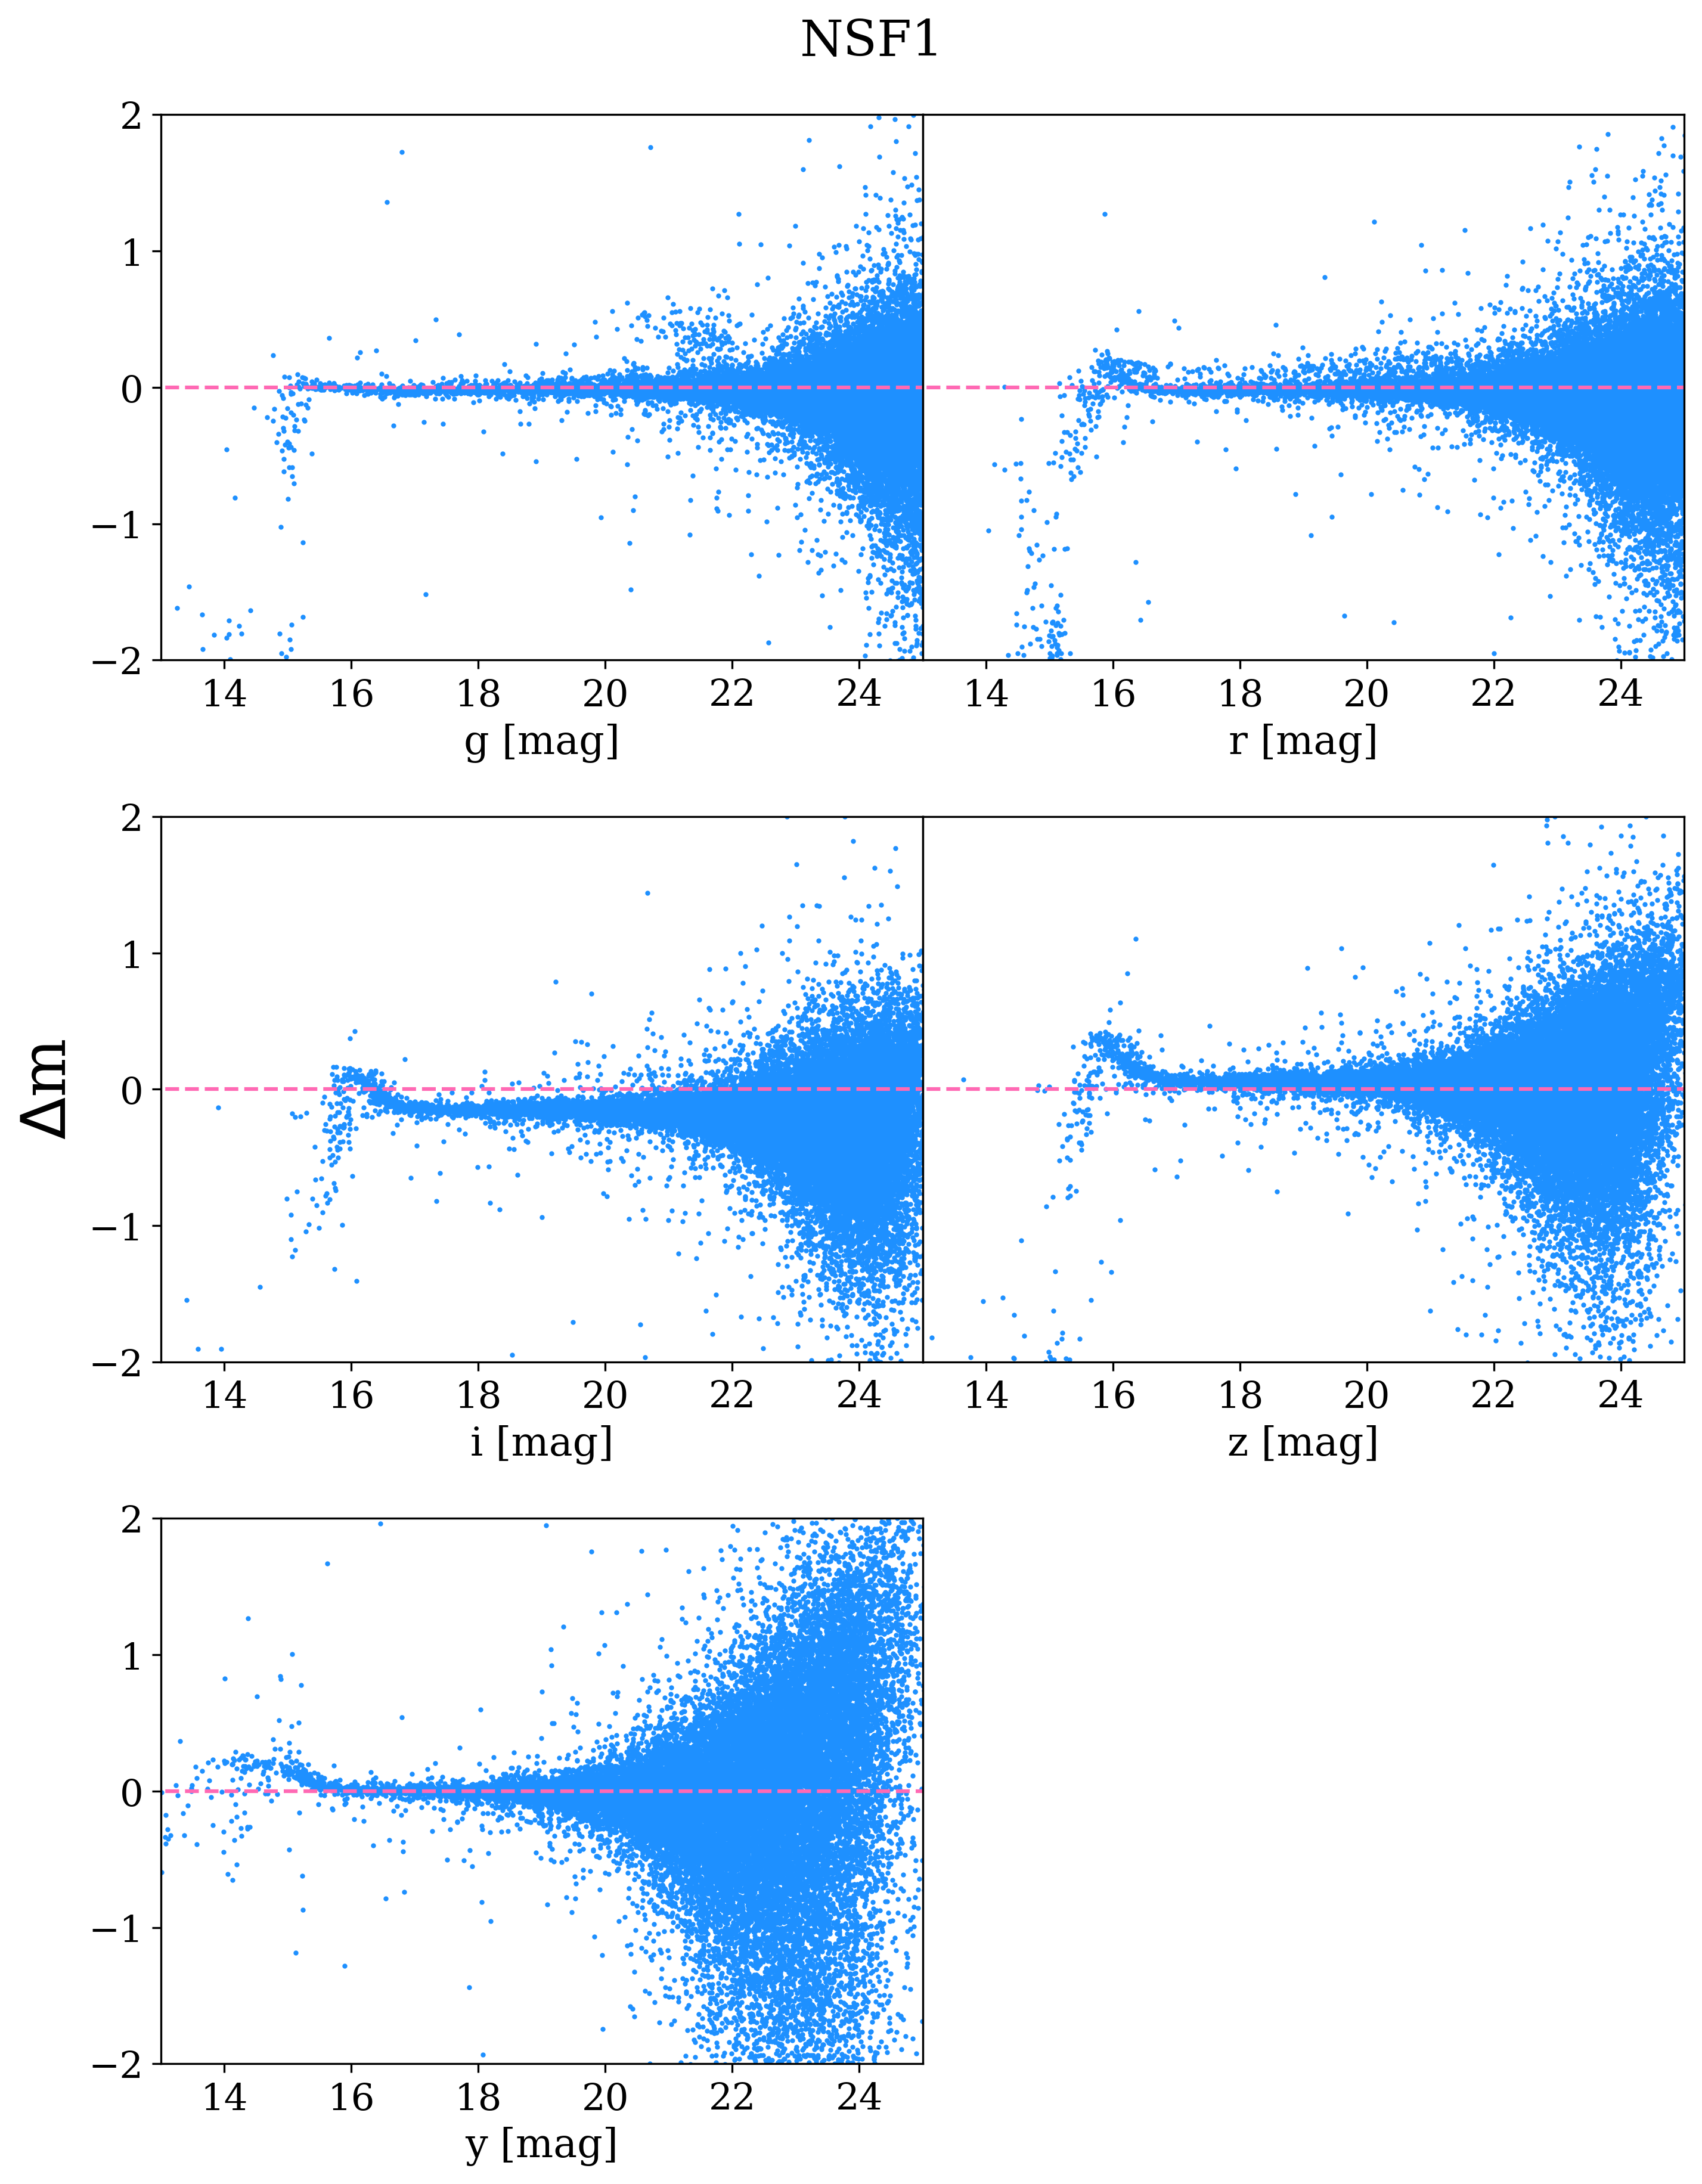

In [18]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_nsf[i]-sigmas[i][2]**2 -mag_noao[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(13,25)
    ax[i//2][i-2*(i//2)].set_ylim(-2,2)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

# Khostovan plots

In [19]:
NB_filter = pd.read_csv('filters/NB640_FilterResponse.dat', sep=" ", header = None)
lambda_NB = NB_filter[0]
trans_NB = NB_filter[1]

g_filter = pd.read_csv('filters/CTIO_DECam.g.dat', sep=" ", header = None)
lambda_g = g_filter[0]
trans_g = g_filter[1]

r_filter = pd.read_csv('filters/CTIO_DECam.r.dat', sep=" ", header = None)
lambda_r = r_filter[0]
trans_r = r_filter[1]

i_filter = pd.read_csv('filters/CTIO_DECam.i.dat', sep=" ", header = None)
lambda_i = i_filter[0]
trans_i = i_filter[1]

z_filter = pd.read_csv('filters/CTIO_DECam.z.dat', sep=" ", header = None)
lambda_z = z_filter[0]
trans_z = z_filter[1]

y_filter = pd.read_csv('filters/CTIO_DECam.Y.dat', sep=" ", header = None)
lambda_y = y_filter[0]
trans_y = y_filter[1]


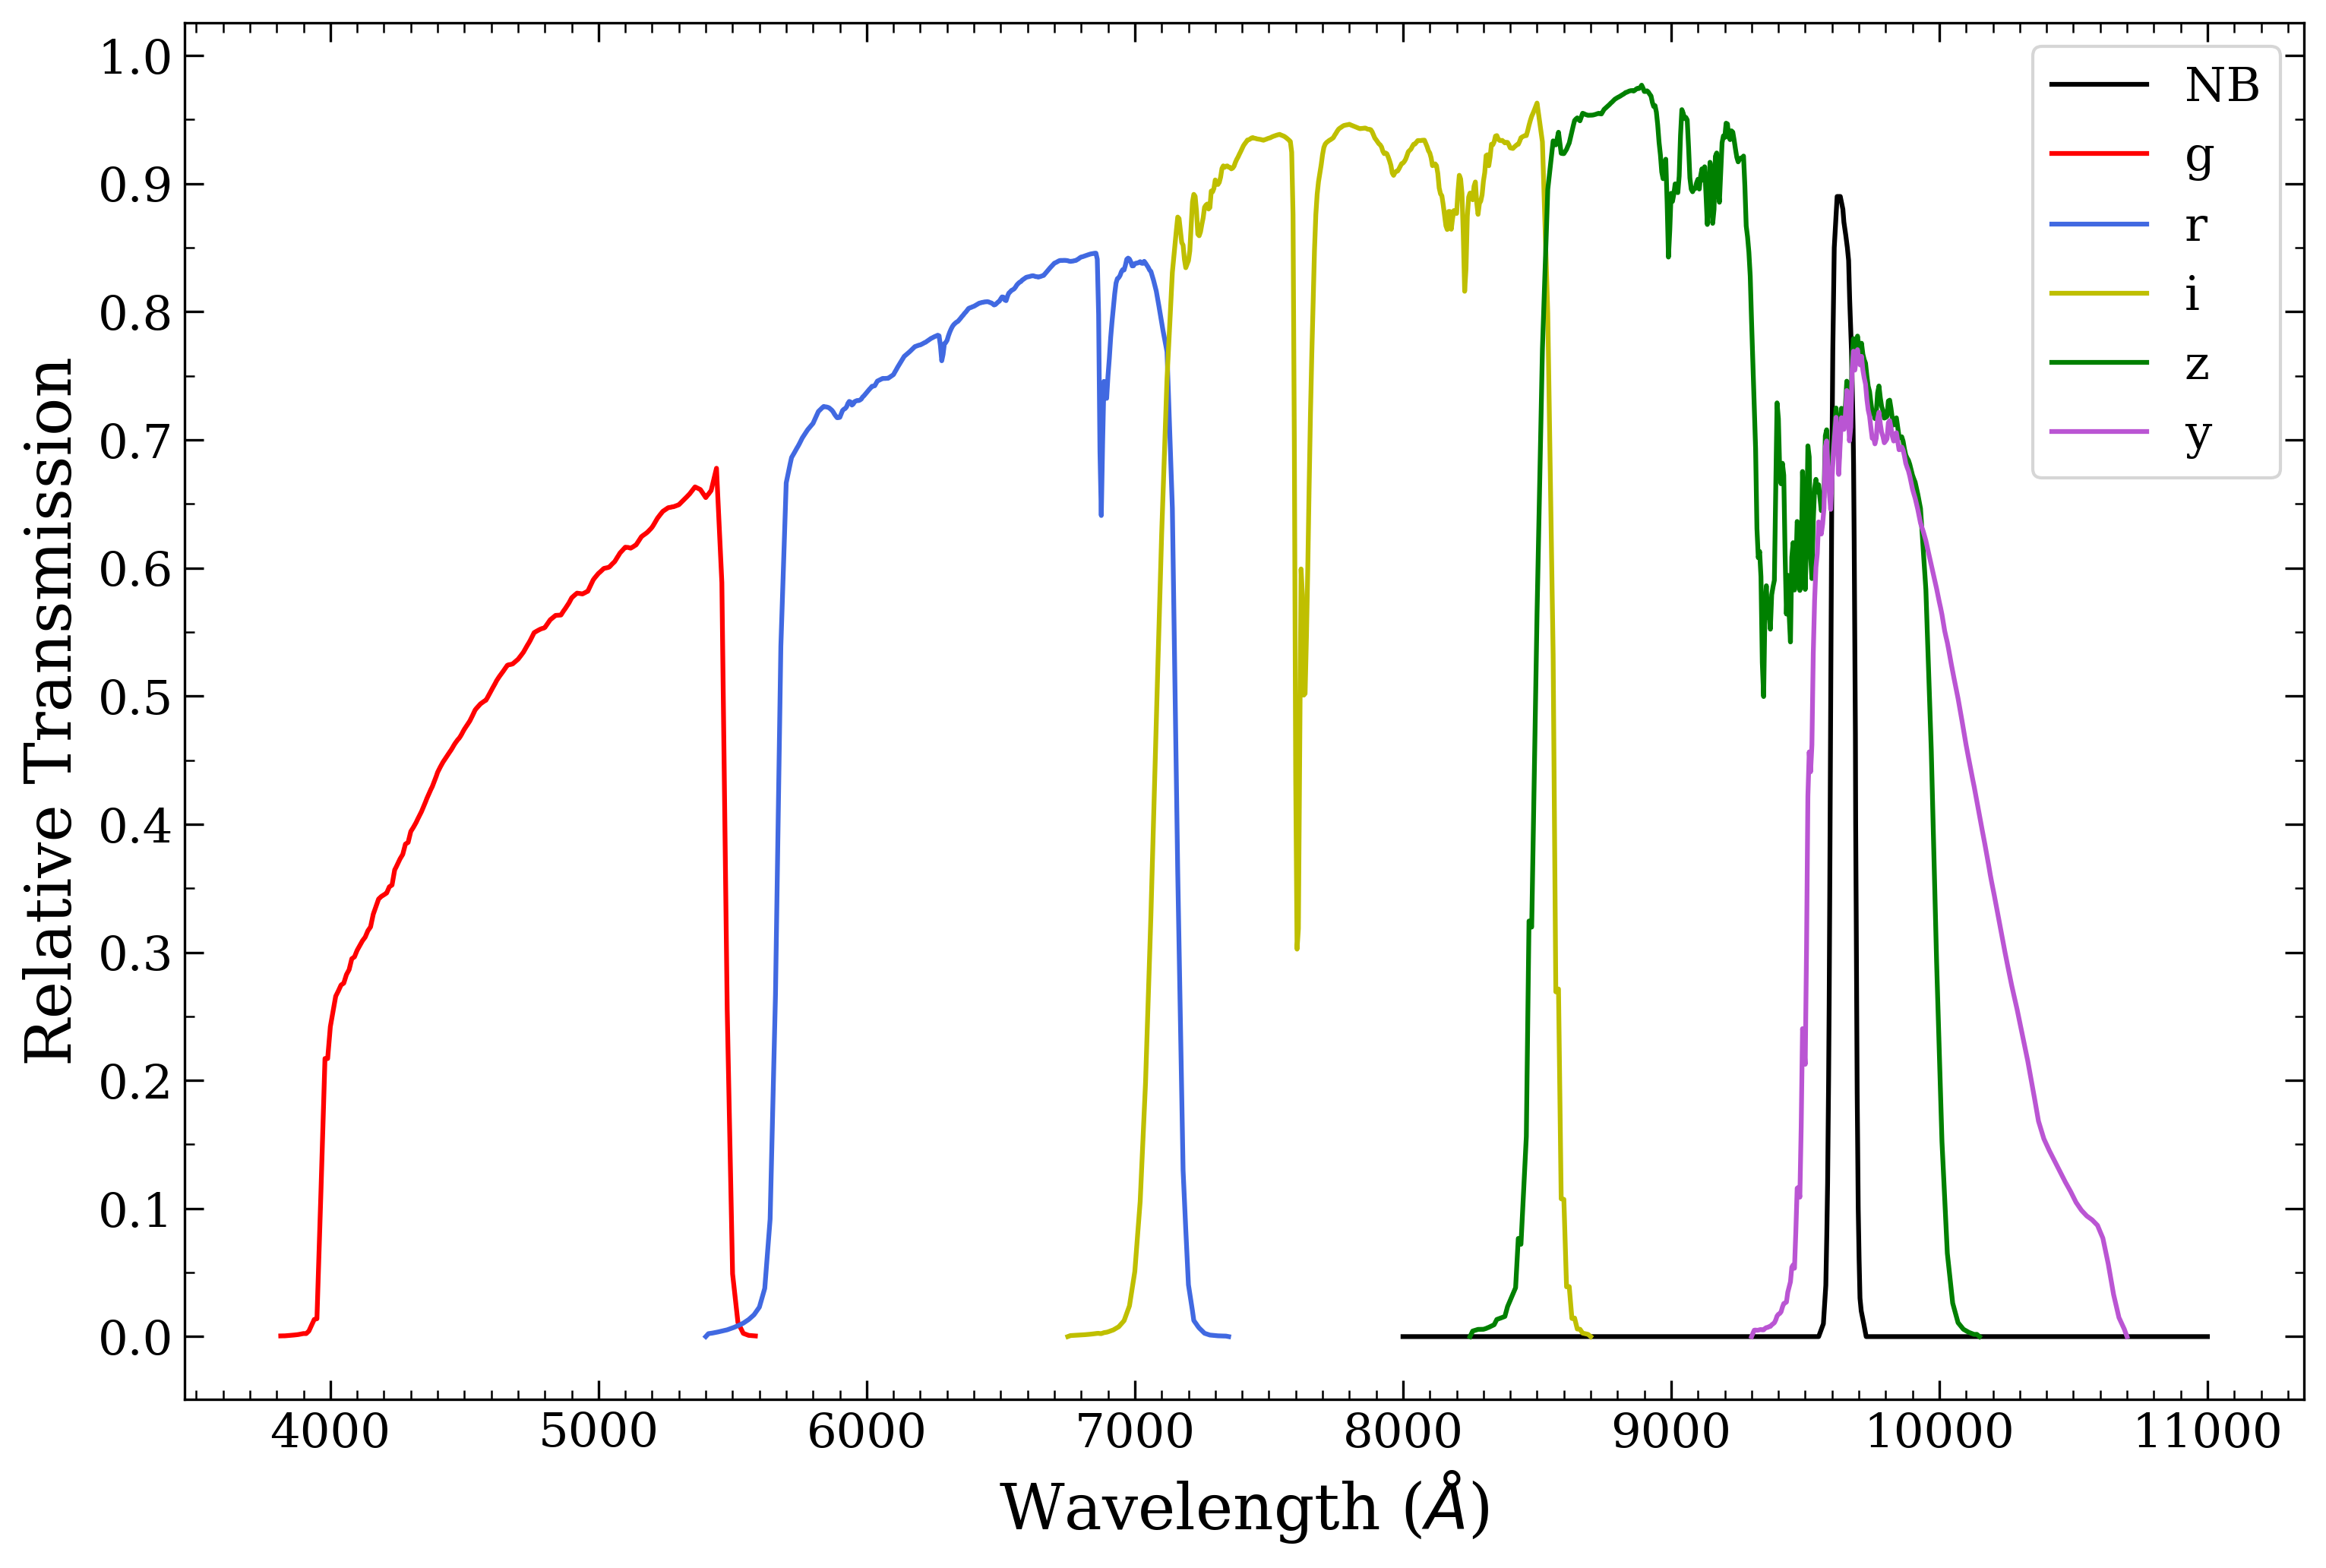

In [20]:
fig, ax= plt.subplots(figsize =(12,8), dpi =300)

ax.plot(lambda_NB, trans_NB, color = 'k', label='NB')
ax.plot(lambda_g, trans_g, color = 'r', label= 'g')
ax.plot(lambda_r, trans_r, color = 'royalblue', label = 'r')
ax.plot(lambda_i, trans_i, color = 'y', label = 'i')
ax.plot(lambda_z, trans_z, color = 'g', label = 'z')
ax.plot(lambda_y, trans_y, color = 'mediumorchid', label ='y')

#ax.fill(lambda_NB,trans_NB, alpha = 0.7, color = 'black')  
ax.xaxis.set_major_locator(ticker.MultipleLocator(1000))      # Ticks principales cada 1 unidades en el eje x
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))    # Ticks secundarios cada 0.1 unidades en el eje x
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))      # Ticks principales cada 1 unidades en el eje y
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax.tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax.tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)    

ax.set_xlabel(r'Wavelength ($\AA$)')
ax.set_ylabel(r'Relative Transmission')
# ax.set_xlim(3600,6700) 
# ax.set_ylim(-40,60)
plt.legend()
plt.show()

In [21]:
lines = np.array([3727.092,4862.68,4960.295, 5008.240, 6564.61]) #OII, HB, OIII, OIII,  Ha

spectra = np.linspace(3500, 7000, 1000)

sigma = 2.60

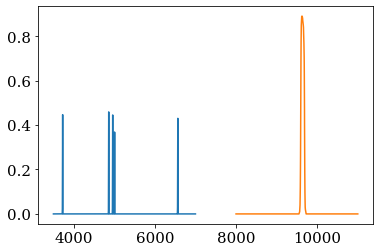

In [22]:
flux_tot = np.array([0]*len(spectra))
#flux_tot = np.array([])

for i,mu in enumerate(lines):
    
    snd = norm(mu, sigma)
    #gauss = np.random.normal(mu,sigma,1000)
    #spectra.append(gauss)
    #plt.hist(gauss, bins = 100)
    flux_pdf = snd.pdf(spectra)
    #np.append(flux_tot, flux)
    flux_tot =  flux_tot + np.array(flux_pdf)
plt.plot(spectra, flux_tot*3)
plt.plot(lambda_NB,trans_NB)

#plt.xlim(8000,11000)
plt.show()

In [23]:
def redshift_func(obs,rest):
    return (obs-rest)/rest

lambdas = []
for i,flux in enumerate(flux_tot):
    if flux >= 10e-15 and flux <= 10e-10:
        lambdas.append(spectra[i])

In [24]:
redshifts_min = []
redshifts_max = []
for i in range(len(lambdas)):
    if i % 2 == 0:    
        maxi = 9718.46    
        reds_2 = redshift_func(maxi, lambdas[i])
        redshifts_max.append(reds_2)
    else:
        minn =  9567.77
        reds_1 = redshift_func(minn,lambdas[i])
        redshifts_min.append(reds_1)


In [25]:
redshifts_min

[1.5546444554323133,
 0.9604557953030459,
 0.9218261244596361,
 0.9030766012941764,
 0.46116368264159596]

In [26]:
redshifts_max

[1.619382581950627,
 1.0057311310814996,
 0.9659292376227598,
 0.947981849919743,
 0.4849711746711531,
 0.4762778894548769]

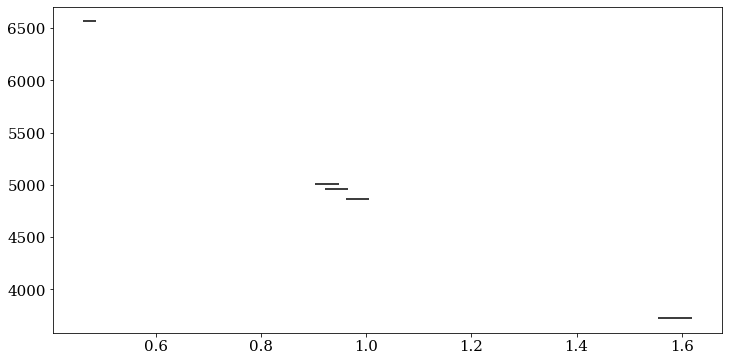

In [37]:
redshift_range = np.linspace(0,3,1000)
names =  ['[OII]', r'H$\beta$','[OIII]', '[OIII]', r'H$\alpha$']
fig= plt.figure(figsize=(12,6))

for i in range(len(redshifts_min)):
    plt.hlines(lines[i],redshifts_min[i],redshifts_max[i], label = names[i])

    #plt.legend(fontsize = 15, loc=2)
plt.show()


## Figure 2

In [38]:
spectra_12 = fits.open('spec-0266-51602-0012.fits')
#spectra_12[1].header

In [39]:
tabla_s = Table(spectra_12[1].data) #'1E-17 erg/cm^2/s/Ang'
tabla_s

<Table length=3837>
   flux     loglam     ivar    and_mask or_mask    wdisp       sky      model  
 float32   float32   float32    int32    int32    float32    float32   float32 
---------- ------- ----------- -------- -------- ---------- --------- ---------
 8.7938795  3.5803 0.054499146        0        0  1.2542306 6.6273575  6.400915
 15.133193  3.5804 0.049941942        0        0  1.2539674  6.350275 6.7443757
 10.525017  3.5805 0.054116465        0  1048576  1.2537054  6.102744  7.076035
 5.9962425  3.5806  0.05642516        0  1048576  1.2534407 5.8924546 7.0031614
10.1530485  3.5807 0.054067086        0        0  1.2531763 5.7358813 6.9693155
 6.8847594  3.5808   0.0554319        0  1048576   1.252914 5.6099167  7.138657
  9.388606  3.5809  0.05373349        0  1048576  1.2526534 5.5246525 7.0305943
 11.812909   3.581 0.053656586        0        0  1.2523897  5.526845  6.957755
 3.1496577  3.5811 0.057259686        0  1048576  1.2521226 5.5761123  6.885278
 2.0177612  3.5812  0.05949109        0  1048576   1.251867   5.92605 6.6176767
       ...     ...         ...      ...      ...        ...       ...       ...
 16.815762   3.963  0.43212596       16       16 0.79813266 3.5310082 12.835145
 15.777042  3.9631  0.42369637       16       16  0.7979501 3.5881402 12.872862
 14.909575  3.9632  0.43088755       16       16  0.7977675 3.5933628 12.852071
 15.220739  3.9633  0.32348144       16 33554448  0.7975773   3.37425 12.831272
 14.451747  3.9634   0.3278367       16 33554448  0.7973944 3.4068592 12.804901
 16.659075  3.9635   0.4386626       16       16  0.7972185 3.6771362 12.816156
 14.986958  3.9636  0.43236688       16       16   0.797035 3.9185905 12.754558
 12.286306  3.9637   0.4528288       16       16  0.7968516  4.087904 12.784001
 16.704823  3.9638    0.421126       16       16  0.7966673 4.2281528 12.932712
 16.940786  3.9639  0.42537764       16       16  0.7964833  4.486557 12.947592

In [40]:

flux = tabla_s['model']
z= 0.065023
wave = (10**(tabla_s['loglam']))/(1 +z)

In [41]:
np.median(flux)

14.147202

In [42]:
from sklearn import preprocessing

# # normalize the data attributes
# normalized = preprocessing.normalize(flux.reshape(1,-1))
# print("Normalized Data = ", normalized)

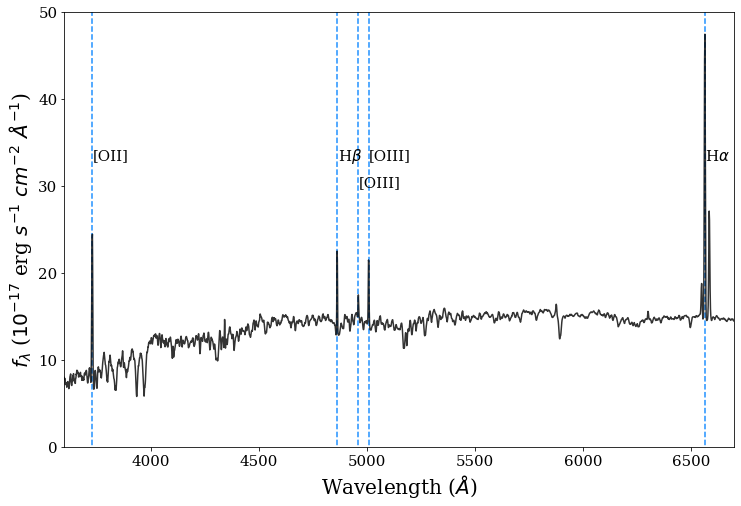

In [43]:
fig, ax= plt.subplots(figsize =(12,8))

ax.plot(wave, flux, color = 'k',alpha =0.8)
#ax.fill(lambda_NB,trans*25, alpha = 0.5, color = 'royalblue')  
#ax.plot(lambda_NB,trans*25, color = 'royalblue') 


for i, lin in enumerate(lines):
    ax.vlines(lines[i],-40,60, linestyle = 'dashed', color = 'dodgerblue')    
    if i == 2:
        ax.text(lines[i]+2, 30, names[i])
    else:
        ax.text(lines[i]+2, 33, names[i])
    

ax.set_xlabel(r'Wavelength ($\AA$)')
ax.set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
ax.set_xlim(3600,6700) 
ax.set_ylim(0,50)
plt.show()

In [44]:
NB = 9640 #AA

# fig, ax= plt.subplots(figsize =(12,10))
# ax.plot(wave +5912.908, flux/25, color = 'black')
# ax.fill(lambda_NB,trans, alpha = 0.5, color = 'royalblue')  
# ax.plot(lambda_NB,trans, color = 'royalblue')
                      
# ax.vlines(NB,-10,60, linestyle = 'dashed', color = 'slategray')
# plt.text(9641, 0.95, '[OII] '+str(lines[0]), size = 15, rotation='vertical')
# ax.set_xlabel(r'Wavelenght ($\AA$)')
# ax.set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
# ax.set_xlim(9550,9750) 
# ax.set_ylim(0,1.2)
# plt.show()

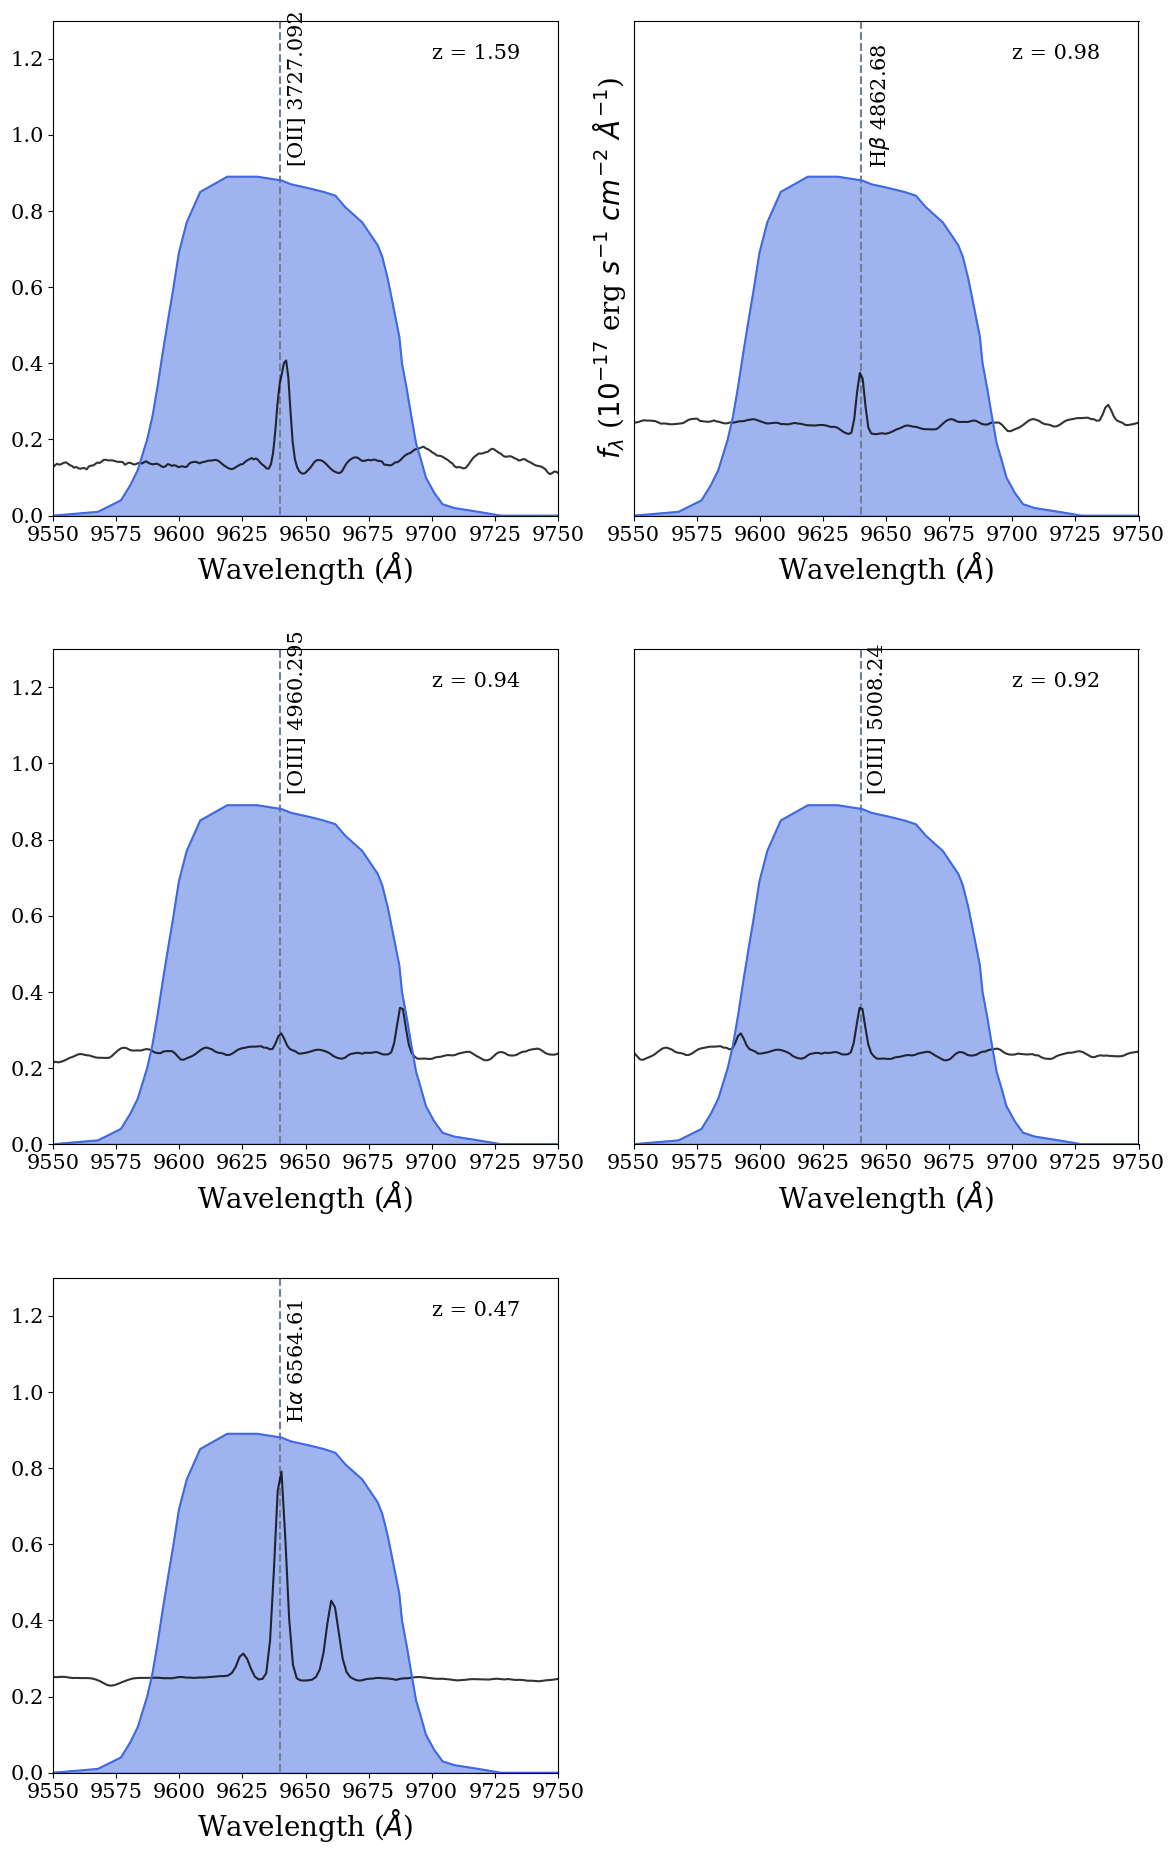

In [45]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(12,19),facecolor= 'w', dpi=100)



for i, lin in enumerate(lines):
    ax[i//2][i-2*(i//2)].plot(wave +(NB - lin), flux/60, color = 'black', alpha =0.8)
    ax[i//2][i-2*(i//2)].fill(lambda_NB,trans_NB, alpha = 0.5, color = 'royalblue')  
    ax[i//2][i-2*(i//2)].plot(lambda_NB,trans_NB, color = 'royalblue')
    ax[i//2][i-2*(i//2)].set_xlabel(r'Wavelength ($\AA$)')
    
    ax[0][1].set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
    #ax[0][0].set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
    
    ax[i//2][i-2*(i//2)].text(9643, 0.93, names[i]+' '+str(lin), size = 15, rotation='vertical')
    ax[i//2][i-2*(i//2)].set_xlim(9550,9750) 
    
    ax[i//2][i-2*(i//2)].vlines(NB,-10,60, linestyle = 'dashed', color = 'slategray')
    ax[i//2][i-2*(i//2)].set_ylim(0,1.3)
    
    
    
    shift = redshift_func(NB,lin)
    
    ax[i//2][i-2*(i//2)].text(9700,1.2,'z = '+str(round(shift, 2)))
    if i in [1,3]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace =0.15)
#plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

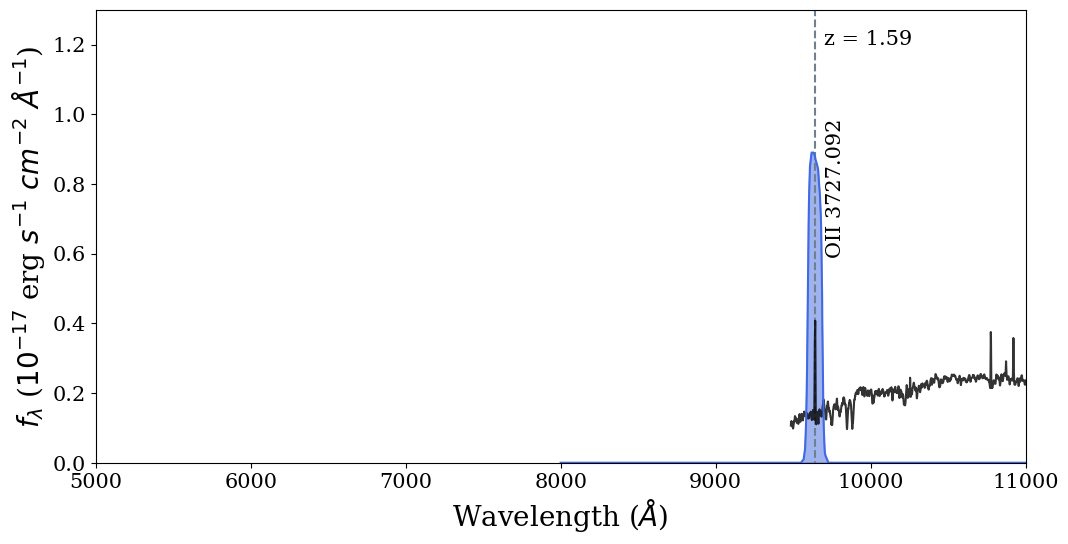

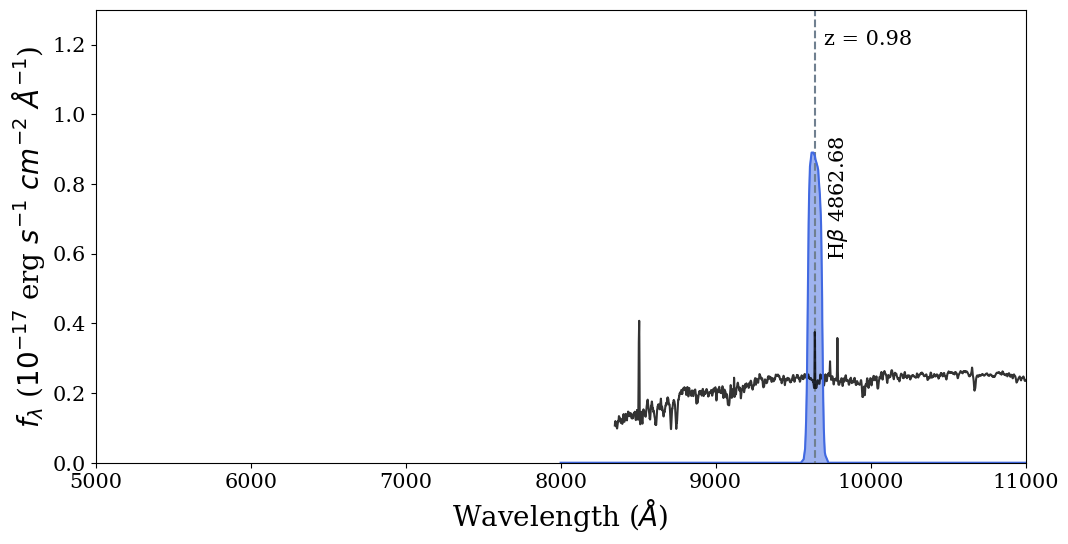

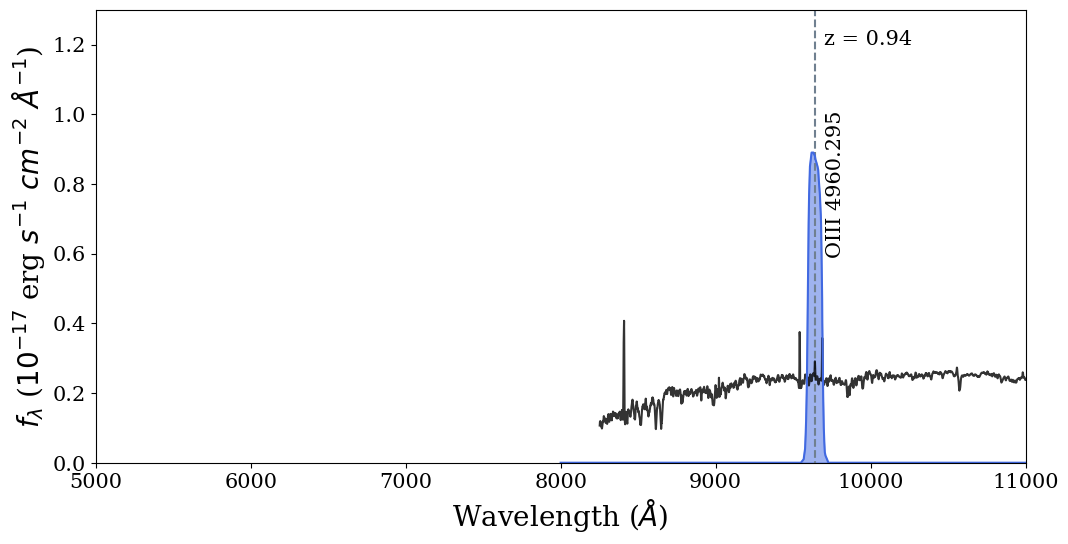

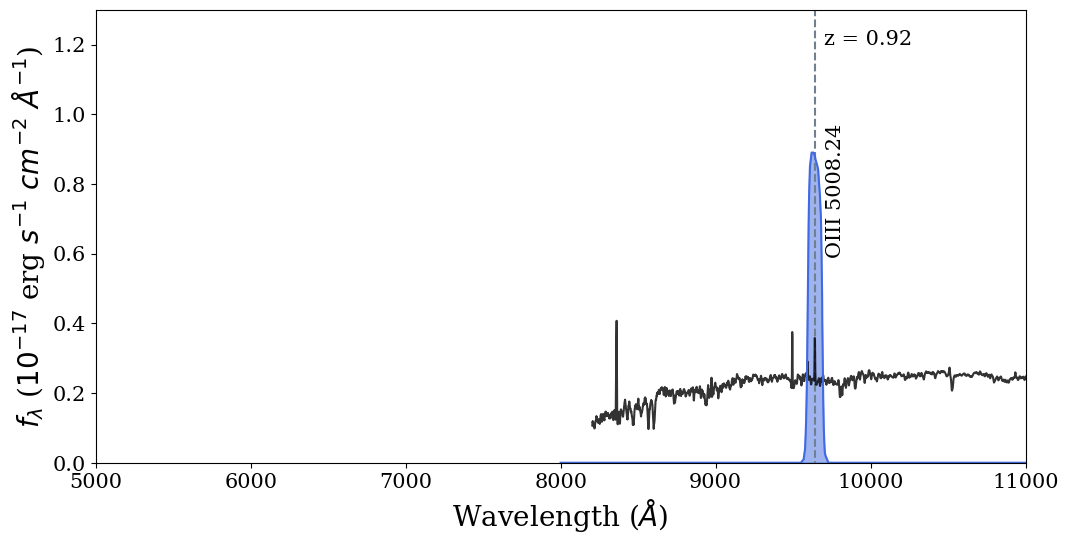

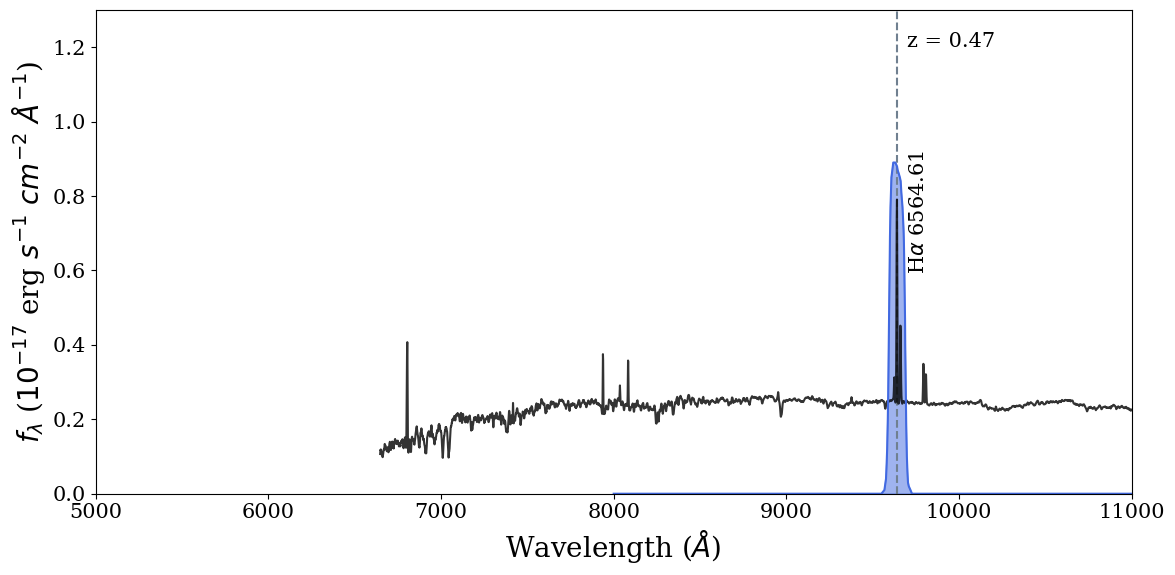

In [36]:
for i, lin in enumerate(lines):
    fig,ax=plt.subplots(ncols =1, nrows =1,figsize=(12,6),facecolor= 'w', dpi=100)
    ax.plot(wave +(NB - lin), flux/60, color = 'black', alpha =0.8)
    ax.fill(lambda_NB,trans_NB, alpha = 0.5, color = 'royalblue')  
    ax.plot(lambda_NB,trans_NB, color = 'royalblue')
    ax.set_xlabel(r'Wavelength ($\AA$)')
    
    ax.set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
    ax.set_ylabel(r'$f_{\lambda}$ ($ 10^{-17}$ erg $s^{-1}$ $cm^{-2}$ $\AA^{-1}$)')
    
    ax.text(9710, 0.6, names[i]+' '+str(lin), size = 15, rotation='vertical')
    ax.set_xlim(5000,11000) 
    
    ax.vlines(NB,-10,60, linestyle = 'dashed', color = 'slategray')
    ax.set_ylim(0,1.3)
    
    
    
    shift = redshift_func(NB,lin)
    
    ax.text(9700,1.2,'z = '+str(round(shift, 2)))
#     if i in [1,3]:
#         ax[i//2][i-2*(i//2)].set_yticks([])
#         ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace =0.15)
#plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()